In [1]:
from fastbook import *
import seaborn as sns

from tools.toolbox import *
from tools.dataset import Data

In [43]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
df = Data.get_g12d()

In [3]:
df

,ID,SMILES,group,with_3F,racemic_trans,mixture_isomer,trans,Kd,IC50,erk_IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,97.7,124.7,3159.1
1,US_2,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,US,1,0,0,0,2.4,2.7,721.4
2,US_3,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,8.3,9.5,10283.1
3,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,US,0,0,0,0,155.7,496.2,8530.0
4,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,294.8,722.9,8193.8
...,...,...,...,...,...,...,...,...,...,...
717,paper_34,FC1=C(C2=C(C=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,paper,0,0,0,0,NaN,27.0,370.0
718,paper_35,FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,paper,0,0,0,0,NaN,7.0,97.0
719,paper_36,FC1=C(C2=C(C(C#C)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,paper,0,0,0,0,NaN,2.0,24.0
720,paper_37,FC1=C(C2=C(C(Cl)=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,paper,0,0,0,0,NaN,2.0,63.0


In [4]:
#duplicates is obtained using tanimo function, followed by hand labeling (take mean of duplicates if target1/2 are not too different)
dup = pd.read_csv('duplicates.csv')

In [5]:
dup

,ID1,ID2,SMILES1,SMILES2,SimilarityScore,Target1,Target2,abs_log10,threshold_1.5,mean
0,US_26,US_461,Oc1cc(-c2ncc3c(nc(OCCN4C[C@@H]5CC4CO5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,[C@@H]12OC[C@@H](N(C1)CCOC=1N=C(C3=C(N1)C(=C(N=C3)C3=CC(=CC1=CC=CC=C31)O)F)N3C[C@H]1CC[C@@H](C3)N1)C2,1,42.1,62.0,0.168110,0,52.05
1,US_18,paper_17,CN(C)CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCCN(C)C)N=C4N5C[C@@H](CC6)N[C@@H]6C5,1,76.8,70.0,0.040263,0,73.40
2,646_5,646_18,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OCC23CCCN3C(CC2)COC(NC)=O)CN(CC1)C1=CC=CC2=CC=CC(=C12)CC,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3[C@H](CC2)COC(NC)=O)CN(CC1)C1=CC=CC2=CC=CC(=C12)CC,1,1.6,2.0,0.096910,0,1.80
3,US_219,US_225,CO[C@@H]1CN2CCC[C@]2(COc2nc(N3CC4CCC(C3)N4)c3cnc(c(F)c3n2)-c2cccc3cccc(Cl)c23)C1,CO[C@H]1CN2CCC[C@]2(COc2nc(N3CC4CCC(C3)N4)c3cnc(c(F)c3n2)-c2cccc3cccc(Cl)c23)C1,1,8.1,9.2,0.055303,0,8.65
4,646_89,646_90,ClC=1C=CC=C2C=CC=C(C12)N1CC=2N=C(N=C(C2CC1)N1C[C@H]2C/C(/[C@@H](C1)N2)=C\C#N)OC[C@H]2N(CCC2)C,ClC=1C=CC=C2C=CC=C(C12)N1CC=2N=C(N=C(C2CC1)N1C[C@H]2C/C(/[C@@H](C1)N2)=C/C#N)OC[C@H]2N(CCC2)C,1,10000.0,1462.9,0.834785,0,5731.45
...,...,...,...,...,...,...,...,...,...,...
69,US_259,US_468,CCc1cccc2cc(O)cc(-c3ncc4c(nc(OC[C@@]56CCCN5C[C@H](F)C6)nc4c3F)N3CC4CCC(C3)N4)c12,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3C[C@H](C2)F)C(=C(N=C1)C1=CC(=CC2=CC=CC(=C12)CC)O)F,1,0.8,2.0,0.397940,0,1.40
70,US_326,paper_24,Oc1cc(-c2ncc3c(nc(OC[C@]45CCCN4C[C@@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@@]56N(C[C@@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1,1.9,2.0,0.022276,0,1.95
71,US_326,paper_25,Oc1cc(-c2ncc3c(nc(OC[C@]45CCCN4C[C@@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@]56N(C[C@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1,1.9,2.0,0.022276,0,1.95
72,US_216,paper_24,Oc1cc(-c2ncc3c(nc(OCC45CCCN4C[C@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@@]56N(C[C@@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1,0.9,2.0,0.346787,0,1.45


In [6]:
unique_ids = set(dup['ID1']).union(set(dup['ID2']))

In [7]:
df = df[~df['ID'].isin(unique_ids)]

In [8]:
df

,ID,SMILES,group,with_3F,racemic_trans,mixture_isomer,trans,Kd,IC50,erk_IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,97.7,124.7,3159.1
3,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,US,0,0,0,0,155.7,496.2,8530.0
4,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,294.8,722.9,8193.8
5,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,US,0,0,0,0,442.2,434.1,11518.2
6,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,US,0,0,0,0,463.5,1867.3,NaN
...,...,...,...,...,...,...,...,...,...,...
692,paper_9,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@H]5N(C)CCC5)N=C4N6CCOCC6,paper,0,0,0,0,1500.0,12000.0,NaN
693,paper_10,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@H]5N(C)CCC5)N=C4N6CC(C)NCC6,paper,0,0,0,0,380.0,2100.0,NaN
694,paper_11,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@H]5N(C)CCC5)N=C4N6C(C)CNCC6,paper,0,0,0,0,280.0,1500.0,NaN
695,paper_12,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@H]5N(C)CCC5)N=C4N6CC7NCC6C7,paper,0,0,0,0,96.0,650.0,NaN


In [9]:
df2 = pd.concat([df, dup[['ID2', 'mean','SMILES2']].rename(columns={'ID2': 'ID','SMILES2':'SMILES', 'mean': 'IC50'})])

In [10]:
df2.drop_duplicates(subset='ID', inplace=True)


In [11]:
df2 = df2.dropna(subset = 'IC50')

In [12]:
df2 = df2.reset_index(drop=True)

In [14]:
df2 = df2[['ID','SMILES','IC50']]

In [15]:
df2

,ID,SMILES,IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30
...,...,...,...
646,paper_21,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.25
647,paper_33,FC1=C(C2=C(C(C#C)=CC=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,2.05
648,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60
649,US_468,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3C[C@H](C2)F)C(=C(N=C1)C1=CC(=CC2=CC=CC(=C12)CC)O)F,1.40


In [16]:
df2.to_csv('dedup_IC50.csv',index=False)

In [6]:
from tools.feature import *

In [7]:
smi_feat = smi2prop(df,'SMILES','ID',True,True)

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

In [39]:
df = df3.copy()

In [40]:
df = df.query('IC50<10000').reset_index(drop=True)

In [41]:
df

,ID,SMILES,IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30
...,...,...,...
627,paper_21,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.25
628,paper_33,FC1=C(C2=C(C(C#C)=CC=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,2.05
629,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60
630,US_468,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3C[C@H](C2)F)C(=C(N=C1)C1=CC(=CC2=CC=CC(=C12)CC)O)F,1.40


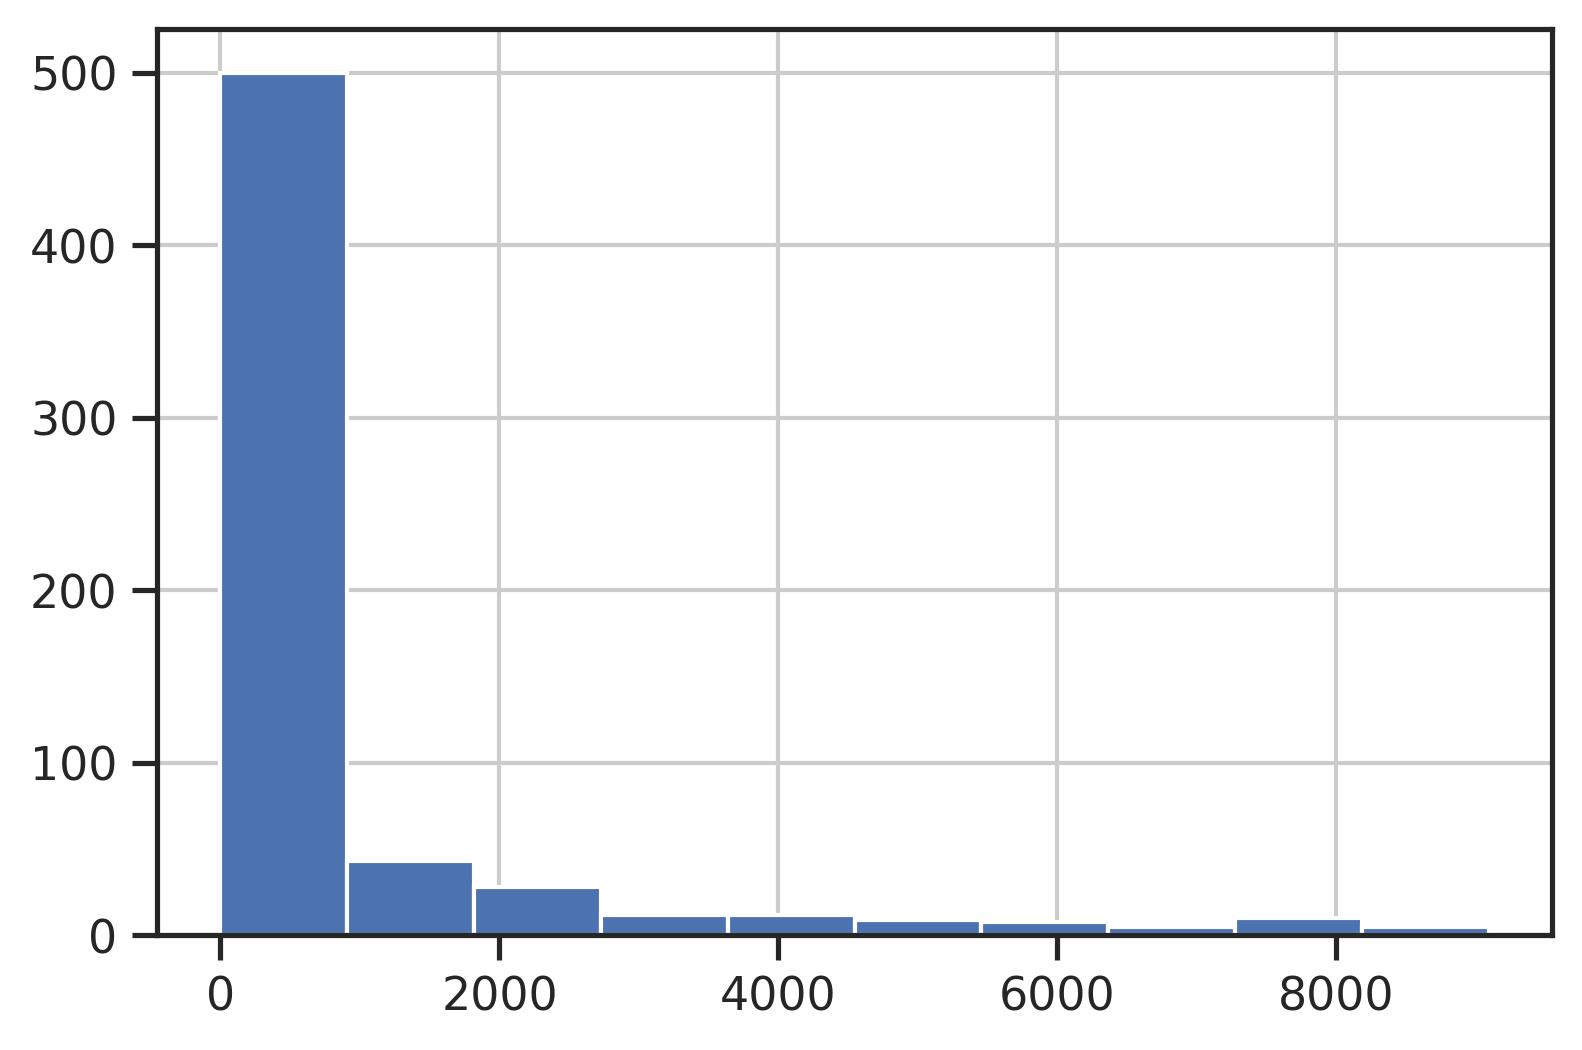

In [44]:
df['IC50'].hist();

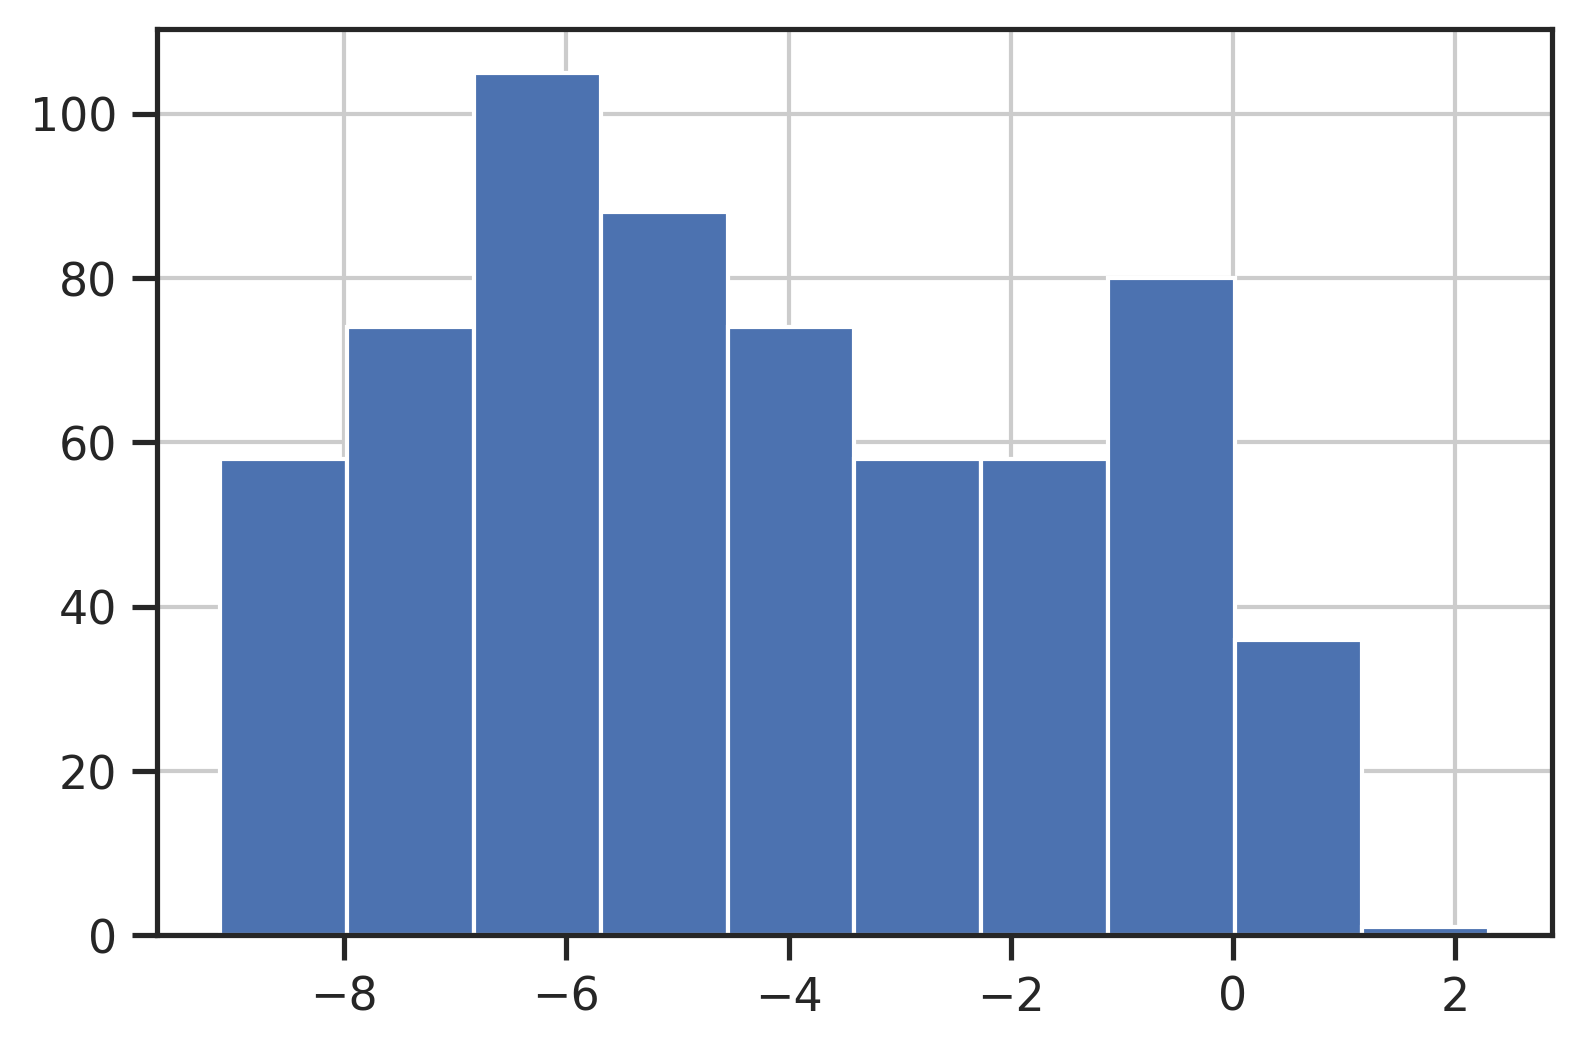

In [46]:
df['IC50'].apply(lambda x: -np.log(x)).hist();

In [47]:
df['pIC50'] = df['IC50'].apply(lambda x: -np.log(x))

In [54]:
df

,ID,SMILES,IC50,pIC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70,-4.825911
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20,-6.206979
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90,-6.583271
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10,-6.073275
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30,-7.532249
...,...,...,...,...
627,paper_21,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.25,-0.223144
628,paper_33,FC1=C(C2=C(C(C#C)=CC=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,2.05,-0.717840
629,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60,0.510826
630,US_468,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3C[C@H](C2)F)C(=C(N=C1)C1=CC(=CC2=CC=CC(=C12)CC)O)F,1.40,-0.336472


In [1]:
from tools.train import *

In [56]:
df

,ID,SMILES,IC50,pIC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70,-4.825911
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20,-6.206979
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90,-6.583271
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10,-6.073275
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30,-7.532249
...,...,...,...,...
627,paper_21,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.25,-0.223144
628,paper_33,FC1=C(C2=C(C(C#C)=CC=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,2.05,-0.717840
629,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60,0.510826
630,US_468,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3C[C@H](C2)F)C(=C(N=C1)C1=CC(=CC2=CC=CC(=C12)CC)O)F,1.40,-0.336472


In [52]:
FEATURES = smi_feat.columns[1:]

In [57]:
df = pd.concat([df,smi_feat],axis=1)

In [58]:
df

,ID,SMILES,IC50,pIC50,ID,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_guanido,fr_halogen,fr_imidazole,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_unbrch_alkane,fr_urea
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.7,-4.825911,US_1,-1.923984,0.927005,1.387816,0.495690,-1.177502,-1.213118,-1.175984,-1.040811,-0.226401,-1.096381,0.971969,-0.226749,-0.596110,-0.010922,0.265598,-0.930350,0.170451,-1.288803,0.518079,-1.521346,0.179088,-0.427943,0.606432,0.332896,-0.598914,-1.031192,-0.797100,-0.911641,-0.924120,-0.769845,-0.860282,-0.799073,-0.894802,-0.795153,-0.890654,-0.854047,-0.964701,-0.114296,-0.161408,-1.070538,-0.755828,-0.350030,-0.968654,0.823210,-1.103301,-1.714217,-0.240365,-0.158625,-0.281279,-0.703882,-1.700547,-0.272264,-0.274378,-0.441017,0.579954,-0.694694,0.394651,-0.823619,-0.302630,-0.191368,0.099485,-0.359106,-0.747853,-0.197768,-0.274678,0.653353,-0.364679,-1.702326,0.903137,-0.740042,0.039886,-0.782312,-1.444125,-0.800468,0.724282,-0.676482,0.612900,0.235800,-1.121256,-0.138763,-1.967659,-1.622158,-1.137919,0.596500,0.430091,-0.088045,0.591483,-0.317877,0.406440,-1.477537,-0.724739,-0.035239,0.994821,0.298143,0.702323,1.063116,0.048298,-0.304034,0.681102,-0.490489,-0.967952,0.497467,0.012623,-0.397182,-0.422950,-0.592663,0.251494,0.099559,0.290105,0.143901,0.649909,-1.201591,-0.660631,-0.361968,-0.286339,-0.448815,-0.516226,-0.886173,-0.637213,-0.039223,-0.286778,-0.274327,-0.153574,-0.040731,-0.173388,1.295767,-0.055513,-0.328706,-0.325848,-0.08343,-0.039223,-0.111570,-0.270098,-0.227368,-0.054431,1.450716,1.781313,-0.087977,-0.142745,-0.519384,-0.064134,-0.318809,-0.496339,-0.521610,-0.317221,-0.055513,-0.328863,-0.055513,-1.581018,-0.212,-0.039223,-0.256174,-0.14825,-0.182574,-0.223607,-0.178772,0.341523,-0.055513,0.345268,-0.039223,-0.087977,-0.039223,-0.055513,-0.199840,-0.096449,-0.173103,-0.039223
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.2,-6.206979,US_4,0.362146,0.275693,-0.482692,-0.443768,-0.696080,-0.607212,-0.693847,-0.742761,-0.225190,-1.096380,0.971968,-0.225369,-1.412035,-0.862698,-0.332368,-0.652118,0.162136,-1.249519,0.527687,-0.971045,0.17860

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
from fastbook import *

In [64]:
df.to_csv('train.csv',index=False)

In [3]:
df=pd.read_csv('train.csv')

In [4]:
FEATURES = df.columns[5:]

In [5]:
from tools.train import *

In [9]:
df = df.dropna(subset = 'pIC50')

In [11]:
df

,ID,SMILES,IC50,pIC50,ID.1,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_guanido,fr_halogen,fr_imidazole,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_unbrch_alkane,fr_urea
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70,-4.825911,US_1,-1.923984,0.927005,1.387816,0.495690,-1.177502,-1.213118,-1.175984,-1.040811,-0.226401,-1.096381,0.971969,-0.226749,-0.596110,-0.010922,0.265598,-0.930350,0.170451,-1.288803,0.518079,-1.521346,0.179088,-0.427943,0.606432,0.332896,-0.598914,-1.031192,-0.797100,-0.911641,-0.924120,-0.769845,-0.860282,-0.799073,-0.894802,-0.795153,-0.890654,-0.854047,-0.964701,-0.114296,-0.161408,-1.070538,-0.755828,-0.350030,-0.968654,0.823210,-1.103301,-1.714217,-0.240365,-0.158625,-0.281279,-0.703882,-1.700547,-0.272264,-0.274378,-0.441017,0.579954,-0.694694,0.394651,-0.823619,-0.302630,-0.191368,0.099485,-0.359106,-0.747853,-0.197768,-0.274678,0.653353,-0.364679,-1.702326,0.903137,-0.740042,0.039886,-0.782312,-1.444125,-0.800468,0.724282,-0.676482,0.612900,0.235800,-1.121256,-0.138763,-1.967659,-1.622158,-1.137919,0.596500,0.430091,-0.088045,0.591483,-0.317877,0.406440,-1.477537,-0.724739,-0.035239,0.994821,0.298143,0.702323,1.063116,0.048298,-0.304034,0.681102,-0.490489,-0.967952,0.497467,0.012623,-0.397182,-0.422950,-0.592663,0.251494,0.099559,0.290105,0.143901,0.649909,-1.201591,-0.660631,-0.361968,-0.286339,-0.448815,-0.516226,-0.886173,-0.637213,-0.039223,-0.286778,-0.274327,-0.153574,-0.040731,-0.173388,1.295767,-0.055513,-0.328706,-0.325848,-0.08343,-0.039223,-0.111570,-0.270098,-0.227368,-0.054431,1.450716,1.781313,-0.087977,-0.142745,-0.519384,-0.064134,-0.318809,-0.496339,-0.521610,-0.317221,-0.055513,-0.328863,-0.055513,-1.581018,-0.212,-0.039223,-0.256174,-0.14825,-0.182574,-0.223607,-0.178772,0.341523,-0.055513,0.345268,-0.039223,-0.087977,-0.039223,-0.055513,-0.199840,-0.096449,-0.173103,-0.039223
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20,-6.206979,US_4,0.362146,0.275693,-0.482692,-0.443768,-0.696080,-0.607212,-0.693847,-0.742761,-0.225190,-1.096380,0.971968,-0.225369,-1.412035,-0.862698,-0.332368,-0.652118,0.162136,-1.249519,0.527687,-0.971045,0.1

In [15]:
df = df.copy()

In [16]:
df['norm_pIC50'] = (df.pIC50 - df.pIC50.mean())/df.pIC50.std()

<AxesSubplot:>

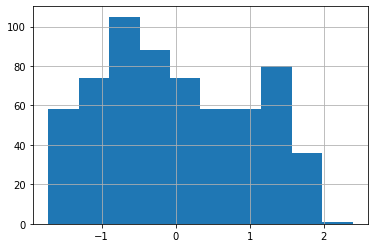

In [18]:
df['norm_pIC50'].hist()

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(505, 167) (505, 1) (127, 167) (127, 1)
Int64Index([470, 459, 427, 598, 335, 527, 415, 132, 150, 307,
            ...
            435, 406, 162,  79, 532, 294, 221, 295, 621, 348],
           dtype='int64', length=127)
[0]	train-rmse:1.13463	valid-rmse:1.04287
[100]	train-rmse:1.07794	valid-rmse:1.01421
[200]	train-rmse:1.02542	valid-rmse:0.99131
[300]	train-rmse:0.97688	valid-rmse:0.97092
[400]	train-rmse:0.93302	valid-rmse:0.95411
[500]	train-rmse:0.89194	valid-rmse:0.93939
[600]	train-rmse:0.85381	valid-rmse:0.92753
[700]	train-rmse:0.81819	valid-rmse:0.91772
[800]	train-rmse:0.78479	valid-rmse:0.91064
[900]	train-rmse:0.75389	valid-rmse:0.90495
[1000]	train-rmse:0.72599	valid-rmse:0.90002
[1100]	train-rmse:0.70001	valid-rmse:0.89636
[1200]	train-rmse:0.

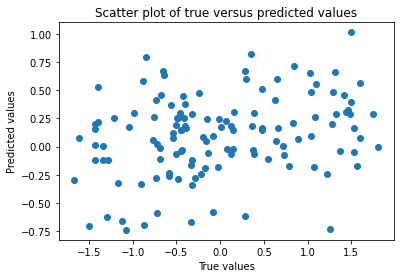

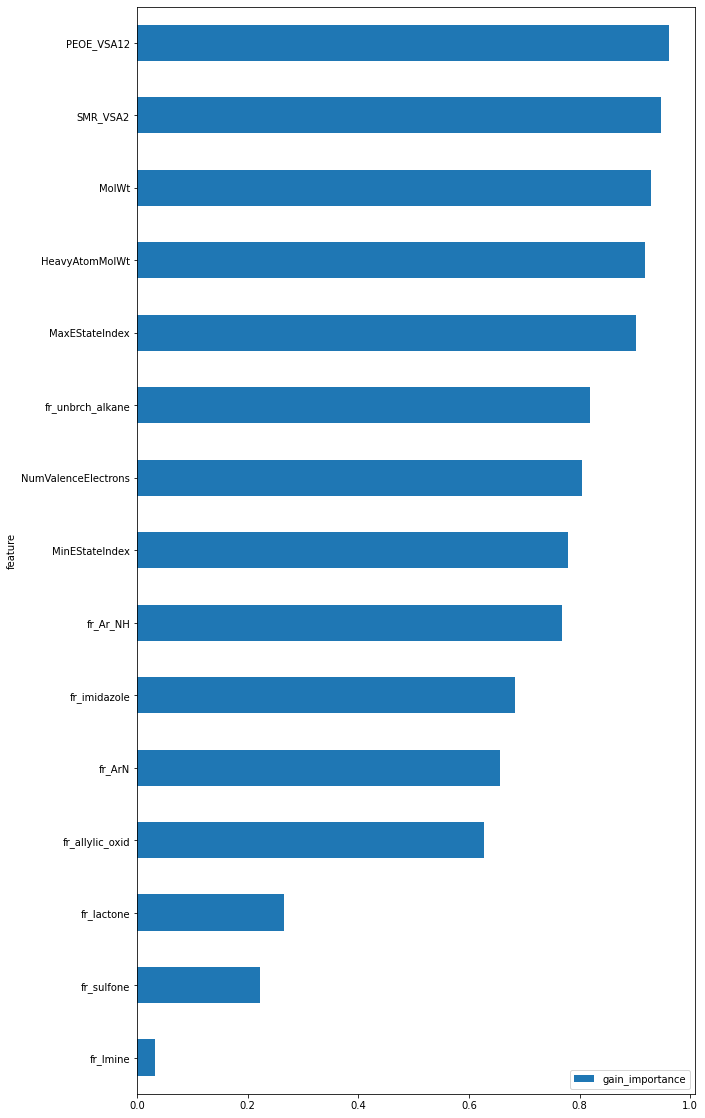

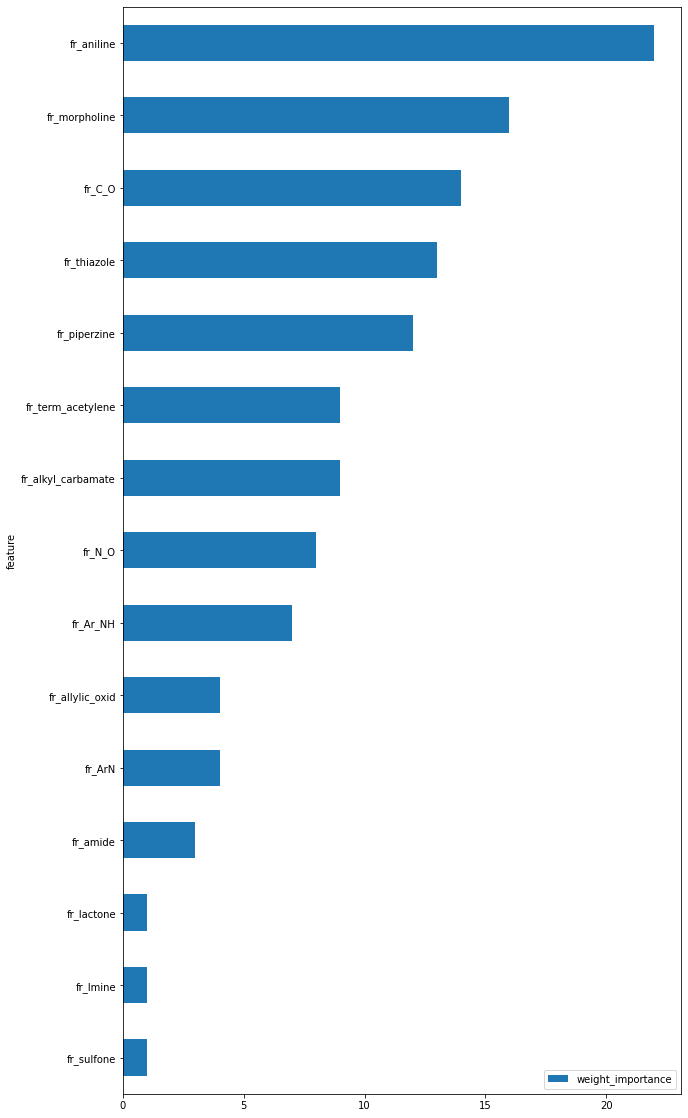

(               feature  gain_importance
 0       MaxEStateIndex         0.902351
 1       MinEStateIndex         0.779162
 2    MinAbsEStateIndex         1.113330
 3                  qed         1.400859
 4                MolWt         0.929291
 ..                 ...              ...
 154         fr_sulfide         2.404547
 155         fr_sulfone         0.221529
 156  fr_term_acetylene         2.391756
 157        fr_thiazole         3.012259
 158   fr_unbrch_alkane         0.818581
 
 [159 rows x 2 columns],
                feature  weight_importance
 0       MaxEStateIndex             3569.0
 1       MinEStateIndex             3066.0
 2    MinAbsEStateIndex             3622.0
 3                  qed             2871.0
 4                MolWt             2098.0
 ..                 ...                ...
 154         fr_sulfide               25.0
 155         fr_sulfone                1.0
 156  fr_term_acetylene                9.0
 157        fr_thiazole               13.0
 158   f

In [21]:
xgb_trainer(df=df,
            feature_col = FEATURES,
            target_col=['norm_pIC50'],
           # test_index=df[df['ID'].str.startswith('paper')].index
           )